In [3]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [4]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | Happy with the flight crew. Ha...,5.0,24th September 2024,United States,False,verify happy flight crew hadn t plane ...
1,✅ Trip Verified | Horrible service from boar...,10.0,22nd September 2024,Morocco,True,horrible service boarding landing fly london...
2,Not Verified | My wife and I are very disappo...,1.0,13th September 2024,United States,False,verify wife disappointed fly british airwa...
3,Not Verified | We flew BA between Heathrow an...,1.0,13th September 2024,Australia,False,verify fly ba heathrow berlin way connecti...
4,Not Verified | Absolutely disgusted with BA. ...,8.0,13th September 2024,United Kingdom,False,verify absolutely disgusted ba flight ca...


In [5]:
df.stars.mean()

4.577517162471396

Text(0.5, 0.98, 'Counts for each ratings')

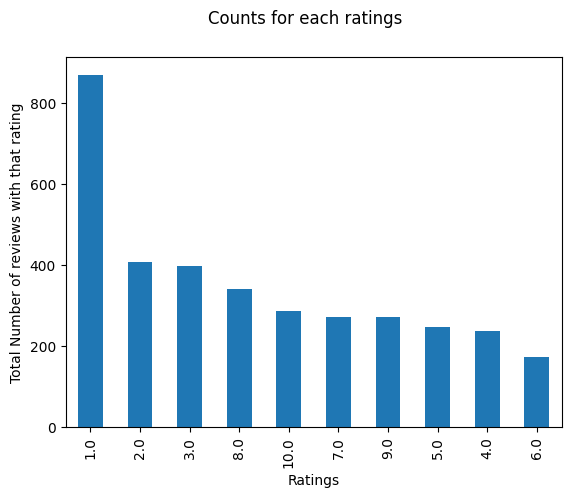

In [6]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [7]:
print(df.columns)


Index(['reviews', 'stars', 'date', 'country', 'verified', 'corpus'], dtype='object')


In [8]:
# Get the value counts of the 'stars' column and store them in a DataFrame
df_ratings = pd.DataFrame(df['stars'].value_counts())

# Rename the column that holds the counts
df_ratings.columns = ['count']

# Calculate the percentage values for each star rating
pct_values = (df_ratings['count'].values / df_ratings['count'].values.sum() * 100).tolist()

# Round the percentages to 2 decimal places
pct_values = [round(x, 2) for x in pct_values]

# Add the percentage values to the DataFrame
df_ratings['pct_values'] = pct_values

# Print the DataFrame to check the result
print(df_ratings)


       count  pct_values
stars                   
1.0      868       24.83
2.0      407       11.64
3.0      398       11.38
8.0      341        9.75
10.0     286        8.18
7.0      271        7.75
9.0      270        7.72
5.0      246        7.04
4.0      236        6.75
6.0      173        4.95


In [9]:
df_ratings = df_ratings.reset_index()

In [10]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [11]:
df_ratings

,total_counts,count,pct_values
0,1.0,868,24.83
1,2.0,407,11.64
2,3.0,398,11.38
3,8.0,341,9.75
4,10.0,286,8.18
5,7.0,271,7.75
6,9.0,270,7.72
7,5.0,246,7.04
8,4.0,236,6.75
9,6.0,173,4.95


In [ ]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.count, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [13]:
print(f"{len(df.country.unique())} unique countries")

71 unique countries


In [14]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [15]:
print(df_country_review.columns)


Index(['country', 'count'], dtype='object')


In [16]:
df_country_review.rename(columns={'total_reviews': 'country', 'count': 'total_reviews'}, inplace=True)

<Axes: xlabel='country'>

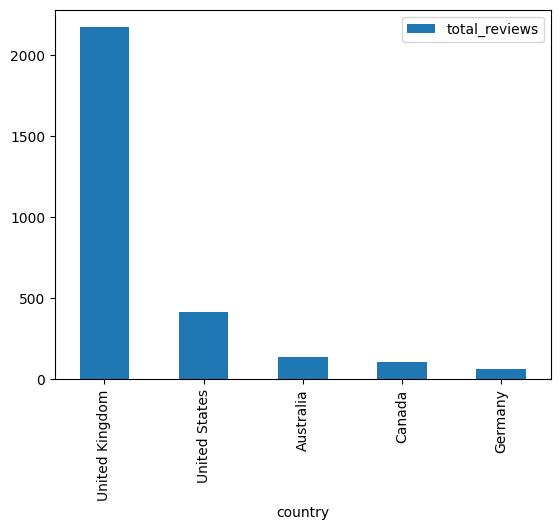

In [17]:
df_country_review.plot(kind="bar", x='country', y='total_reviews')


In [18]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')


In [19]:
df['stars'].fillna(df['stars'].mean(), inplace=True)  # This replaces NaNs with the mean


/var/folders/sn/cx8pxxc55_x3704q_fxg483c0000gp/T/ipykernel_1767/3102704028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stars'].fillna(df['stars'].mean(), inplace=True)  # This replaces NaNs with the mean


In [20]:
df_country_rating = df.groupby('country')['stars'].mean().sort_values(ascending=False).reset_index()


In [21]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

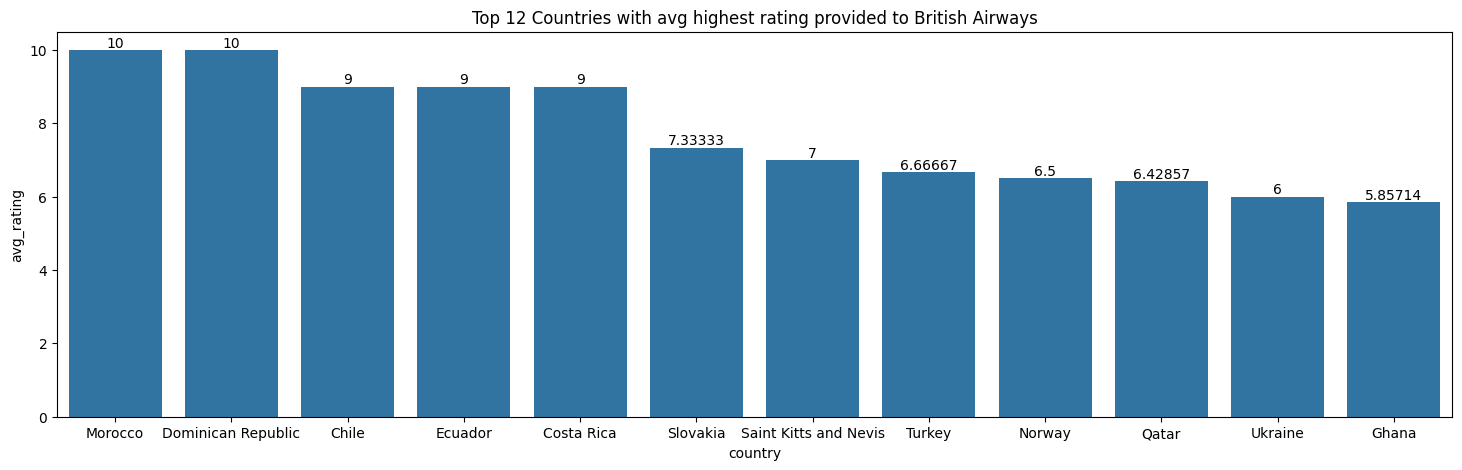

In [22]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [23]:
df['date'] = df['date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['date'] = pd.to_datetime(df['date'], format='%d %B %Y')


In [24]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [25]:
import plotly.graph_objects as go

# Create the line figure
fig = go.Figure()

# Add a line trace
fig.add_trace(go.Scatter(x=df['date'], y=df['stars'], mode='lines', name='Stars'))

# Update x-axis to include a range slider
fig.update_xaxes(rangeslider_visible=True)

# Save the figure as an HTML file
fig.write_html("line_chart.html")

# Optionally, you can open this file in your web browser
import webbrowser
webbrowser.open("line_chart.html")


True

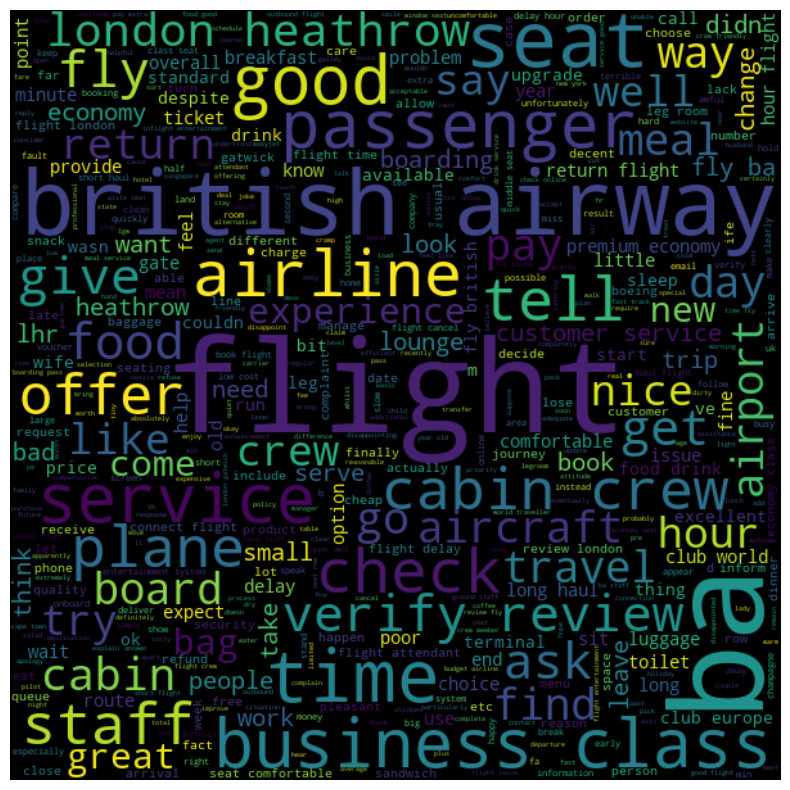

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20, 10))

# Predefined set of English stopwords
custom_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 
    'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 
    'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 
    'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 
    'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

# Create and generate a word cloud image:
wordcloud = WordCloud(
    height=600,
    width=600,
    max_font_size=100,
    max_words=500,
    stopwords=custom_stopwords
).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()


In [27]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

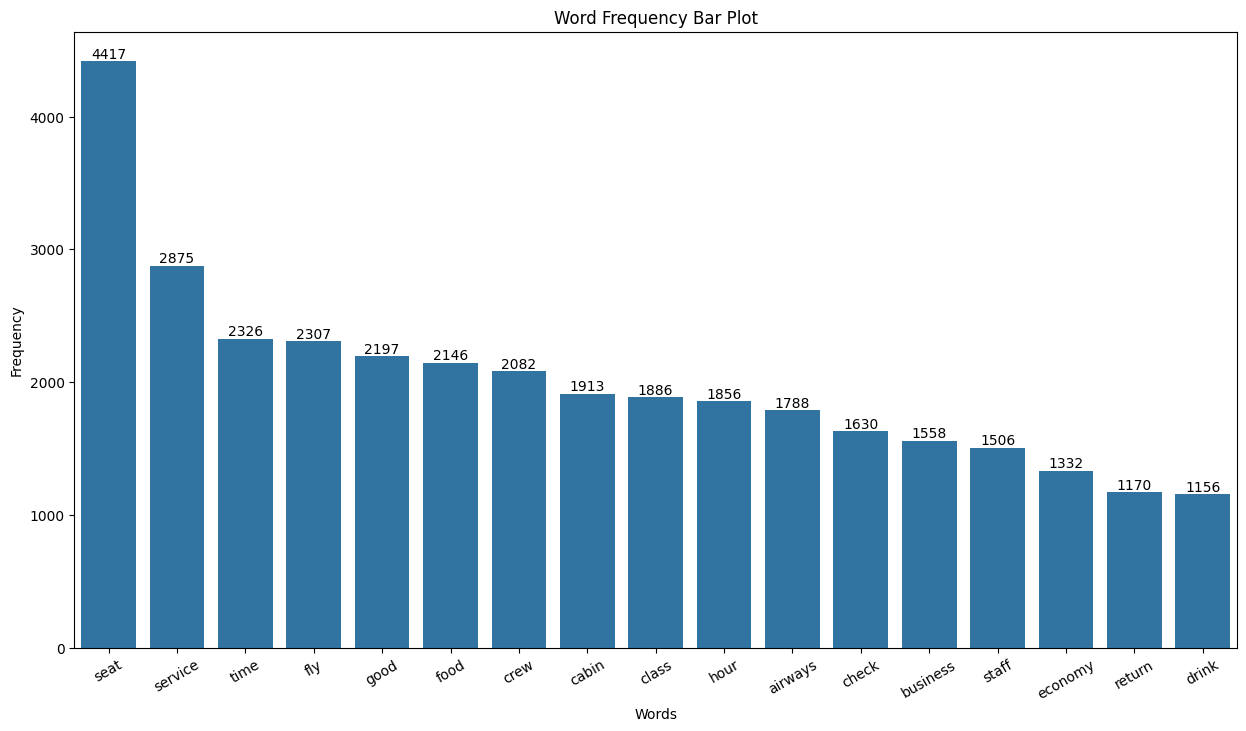

In [28]:
filtered_fdist = all_fdist[~all_fdist.index.isin(['t', 's'])]  # Remove 't' and 's'
filtered_fdist = filtered_fdist[filtered_fdist.index != '']     # Remove any empty string if present

# Setting figure and ax into variables
fig, ax = plt.subplots(figsize=(15, 8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=filtered_fdist.index, y=filtered_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])

# Rotate x-ticks for better visibility
plt.xticks(rotation=30)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Plot')
plt.show()

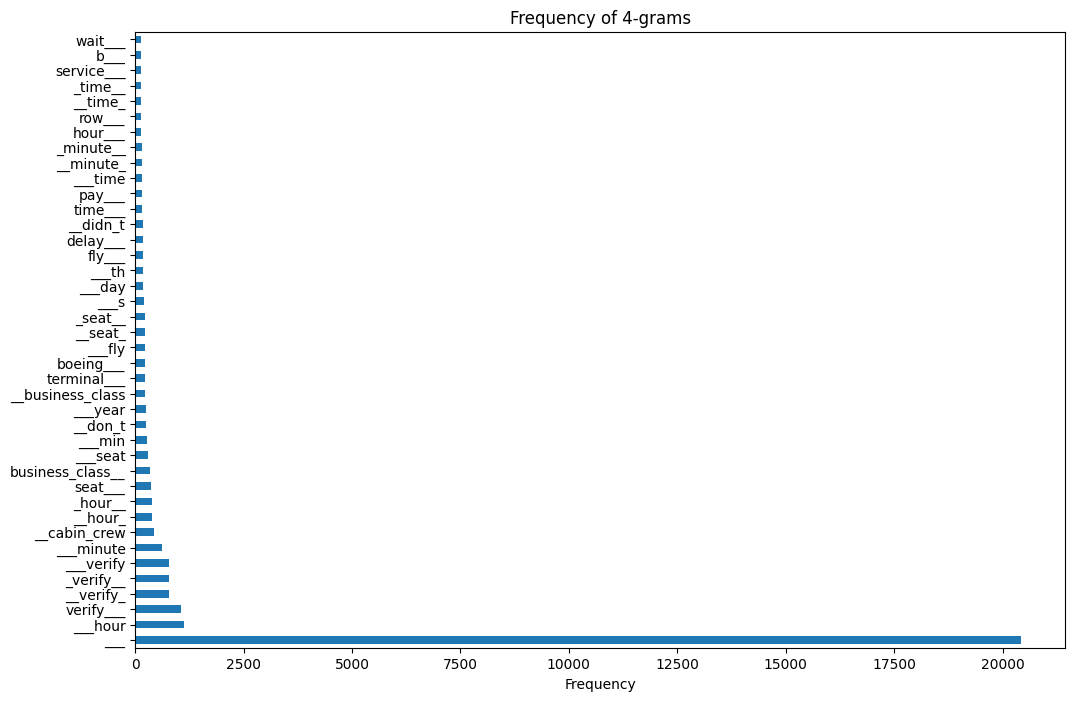

<Axes: title={'center': 'Frequency of 4-grams'}, xlabel='Frequency'>

In [29]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, ngrams
import pandas as pd
import matplotlib.pyplot as plt

reviews = " ".join(df.corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Filter out stopwords
new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    ## Generate ngrams
    ngram_list = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngram_list).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1], reverse=True)}

    ## Join ngram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in ngram_sorted.items()}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)

    plt.figure(figsize=(12, 8))  # Adjust the figure size
    ax = ngram_freqdist.plot(kind="barh")

    # Improve y-axis tick labels
    ax.set_yticklabels(ngram_freqdist.index, rotation=0)  # Set rotation to 0 for horizontal display
    plt.xlabel('Frequency')
    plt.title(f'Frequency of {number_of_ngrams}-grams')
    plt.show()  # Show the plot
    
    return ax

get_freq_dist(new_words, 4)


In [30]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

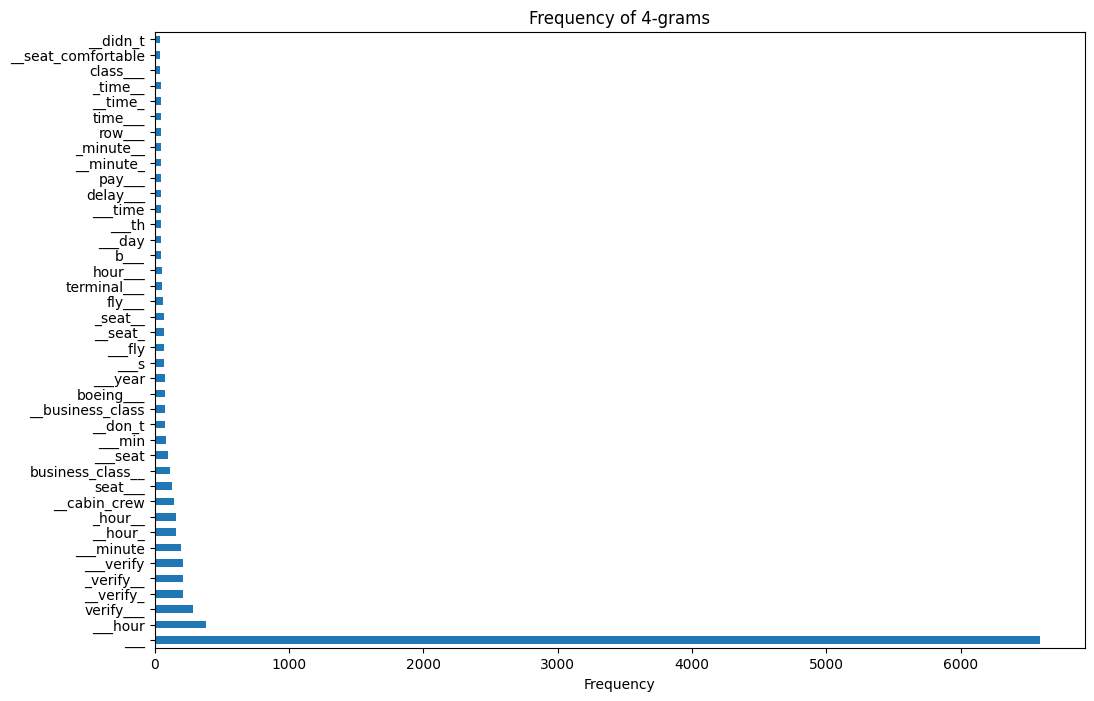

<Axes: title={'center': 'Frequency of 4-grams'}, xlabel='Frequency'>

In [31]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

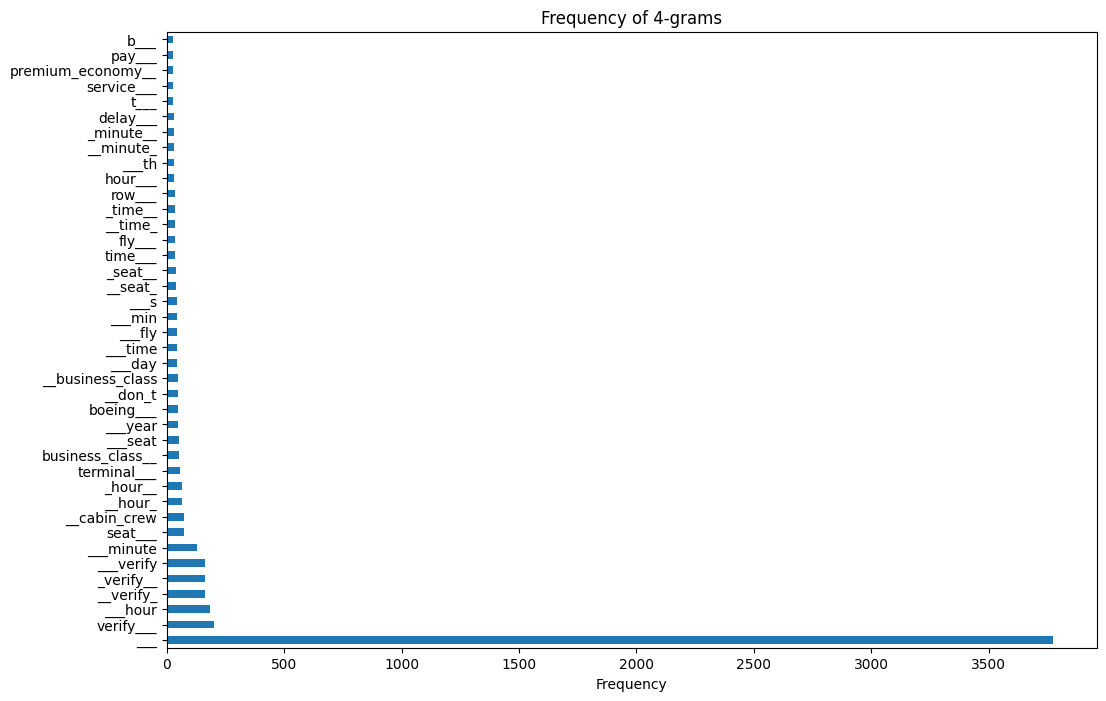

<Axes: title={'center': 'Frequency of 4-grams'}, xlabel='Frequency'>

In [32]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

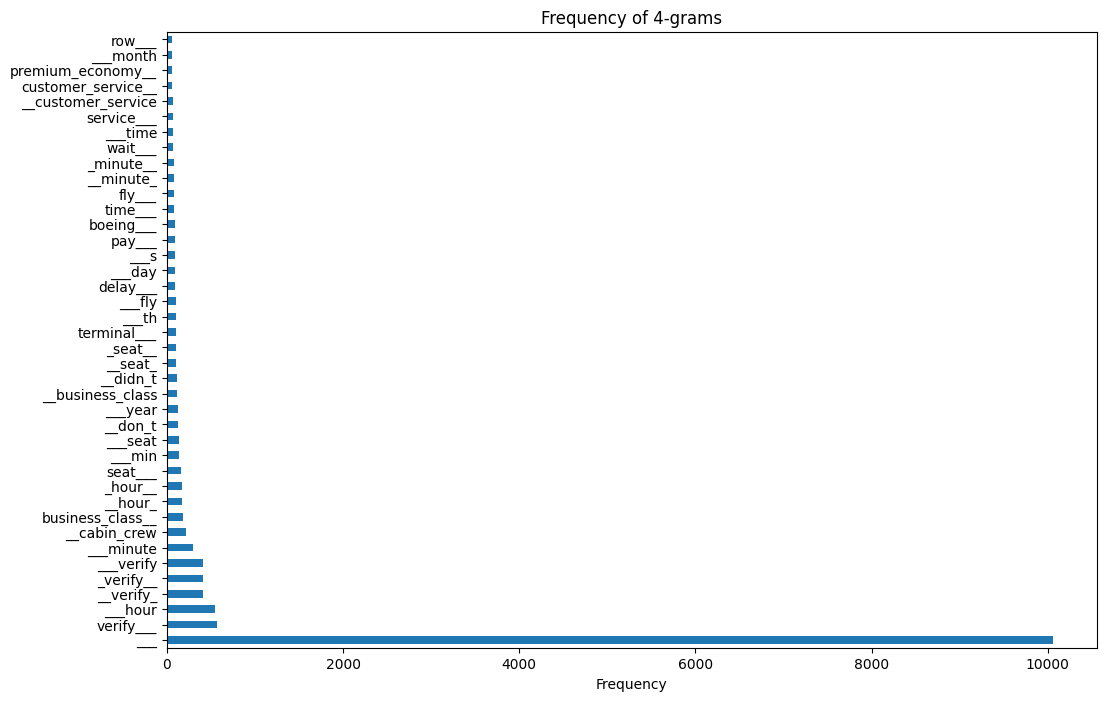

<Axes: title={'center': 'Frequency of 4-grams'}, xlabel='Frequency'>

In [33]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [34]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [35]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2201 number of reviews between -0.2 and 0.2 polarity score
1260 number of reviews between -0.1 and 0.1 polarity score


In [51]:
from textblob import TextBlob

# Initialize labels column
df['label'] = 0

# Function to get sentiment label using TextBlob
def get_sentiment_label(text):
    analysis = TextBlob(text)
    score = analysis.sentiment.polarity
    if score > 0.2:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

# Apply the function to the corpus column
df['label'] = df['corpus'].apply(get_sentiment_label)

# Print the resulting dataframe with sentiment labels
print(df[['corpus', 'label']])


                                                 corpus  label
0     verify     happy flight crew   hadn t plane   ...      1
1     horrible service boarding landing   fly london...     -1
2     verify     wife disappointed fly british airwa...      0
3     verify     fly ba heathrow berlin way connecti...      1
4     verify     absolutely disgusted ba   flight ca...     -1
...                                                 ...    ...
3494  travel palma new ba   sardine   business class...     -1
3495  fly london heathrow singapore business class t...      1
3496  gig lhr b     newly refurbish cabin   seat goo...      1
3497  lhr del   rtn club world   excellent service s...      1
3498  fly ba toronto new delhi london premium econom...      1

[3499 rows x 2 columns]


In [52]:
df.label.value_counts()

label
 0    1429
 1    1107
-1     963
Name: count, dtype: int64

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# Example corpus
corpus = df.corpus

# Initialize the CountVectorizer
vect = CountVectorizer()

# Apply transformation
tf = vect.fit_transform(corpus).toarray()

# Get feature names using the updated method
tf_feature_names = vect.get_feature_names_out()

# Print feature names
print(tf_feature_names)


['aa' 'ab' 'aback' ... 'zum' 'zurich' 'zusammenschluss']


In [55]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [56]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,british,558.2,british,749.6,seat,706.9,flight,2597.8,flight,2417.2,sister,19.0,flight,918.4,class,1033.3
1,airways,474.8,flight,742.1,meal,287.9,ba,1147.3,seat,1738.2,suitcase,11.2,check,693.0,seat,979.2
2,ba,440.4,airline,660.8,cabin,250.6,hour,982.5,good,1648.8,amman,9.1,ba,599.4,business,941.1
3,customer,414.1,airways,602.5,drink,199.6,delay,575.9,ba,1460.9,hold,7.6,service,469.9,ba,841.9
4,flight,380.5,fly,493.2,serve,198.7,book,499.8,crew,1349.8,point,7.5,boarding,411.5,flight,429.3
5,service,336.6,london,457.1,crew,183.1,tell,479.5,food,1270.3,monday,6.8,time,376.6,fly,323.9
6,bag,334.5,seat,453.5,ask,173.4,london,473.2,cabin,1170.2,agent,6.0,staff,346.0,economy,243.3
7,tell,315.5,economy,397.3,flight,164.5,cancel,465.6,service,1052.6,credit,5.8,crew,336.9,pay,240.1
8,seat,258.4,food,331.8,offer,161.0,day,443.3,time,957.7,avio,5.8,bag,324.0,lounge,233.8
9,check,255.9,service,305.5,class,160.2,time,434.2,club,686.8,number,5.8,passenger,303.8,club,201.8


In [57]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.0450596 , 0.00370659],
       [0.03908203, 0.04164187],
       [0.03104267, 0.02620948],
       ...,
       [0.        , 0.04224525],
       [0.0134307 , 0.07477395],
       [0.04112541, 0.22299132]])

In [58]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [59]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,33.4,seat,18.1
1,ba,12.0,ba,9.3
2,hour,7.8,class,7.7
3,time,6.3,business,6.2
4,london,5.7,service,6.0
5,service,5.5,good,6.0
6,check,5.3,food,6.0
7,british,5.3,cabin,5.7
8,tell,4.8,crew,5.4
9,airways,4.3,economy,4.7
